# CART-RF-ANN
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

#Attribute Information:
1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

In [2]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.neural_network import MLPClassifier

## Importing the data

In [3]:
z1 = pd.read_csv('insurance_part2_data.csv')

## Checking Data from start values

In [4]:
z1.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


## Checking Data from end values

In [5]:
z1.tail(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2990,51,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


## Checking the datatypes for variables & missing value if any

In [6]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


## Checking the Statistical points for continuous variables

In [7]:
z1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


## Checking the number of rows & columns

In [8]:
z1.shape

(3000, 10)

## Are there any missing values ?

In [9]:
z1.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

## Get the proportions

In [10]:
z1.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

## Are there any duplicates ?
Yes the data has enough number of duplicates. Removal of duplicates not required as we cannot see any unique identifier in the data set. As the information is different for different rows therefore dropping them is not a good thing. These may be of different people.

In [11]:
dups = nw1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
nw1[dups]

NameError: name 'nw1' is not defined

# Evaluating 'Age'

In [ ]:
z1['Age'].unique()
z1['Age'].value_counts()

In [ ]:
sns.distplot(z1['Age'],kde=False)

In [ ]:
sns.boxplot(z1['Age'])

In [ ]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(z1['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(z1['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Evaluating 'Agency_Code'

In [ ]:
z1['Agency_Code'].unique()
z1['Agency_Code'].value_counts()

In [ ]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.countplot(z1['Agency_Code'])

In [ ]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.boxplot(data = z1, x = 'Agency_Code', y='Sales', hue = 'Claimed')

# Evaluating 'Channel'

In [ ]:
z1['Channel'].unique()
z1['Channel'].value_counts()

In [ ]:
sns.countplot(z1['Channel'])

In [ ]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.boxplot(data = z1, x = 'Channel', y='Sales', hue = 'Claimed')

# Evaluating 'Claimed'

In [ ]:
z1['Claimed'].unique()
z1['Claimed'].value_counts()

In [ ]:
sns.countplot(z1['Claimed'])

In [ ]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.boxplot(data = z1, x = 'Claimed', y='Sales', hue = 'Channel')

# Evaluating 'Commission'

In [ ]:
z1['Commision'].unique()
z1['Commision'].value_counts()

In [ ]:
sns.distplot(z1['Commision'],kde=False)

In [ ]:
sns.boxplot(z1['Commision'])

In [ ]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(z1['Commision'],ax=ax2)
ax2.set_xlabel('Commision', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(z1['Commision'])
ax3.set_xlabel('Commision', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Evaluating 'Type'

In [ ]:
z1['Type'].unique()
z1['Type'].value_counts()

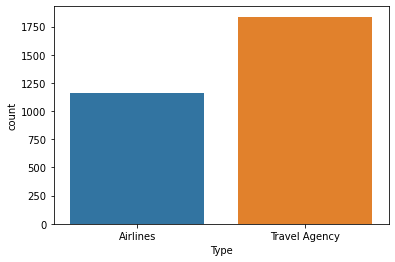

In [12]:
sns.countplot(z1['Type'])

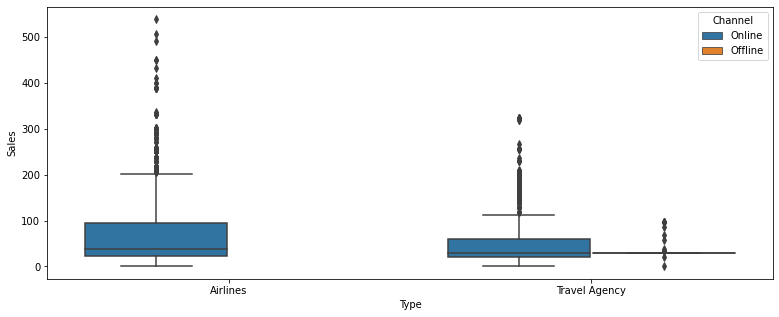

In [13]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.boxplot(data = z1, x = 'Type', y='Sales', hue = 'Channel')

# Evaluating 'Channel'

In [14]:
z1['Channel'].unique()
z1['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

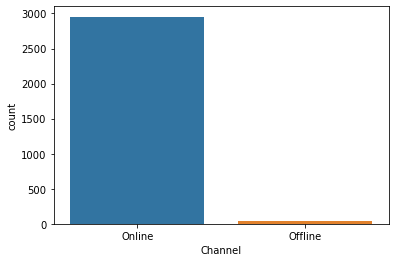

In [15]:
sns.countplot(z1['Channel'])

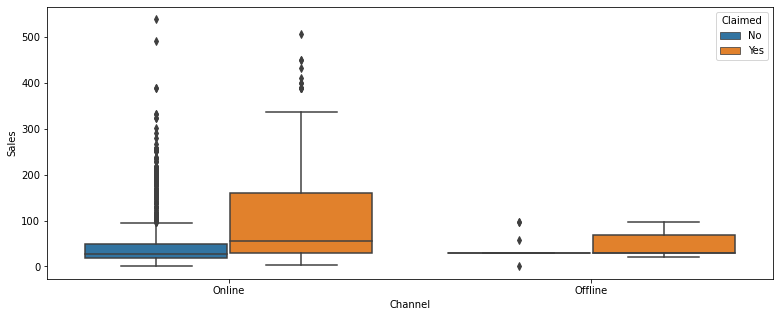

In [16]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.boxplot(data = z1, x = 'Channel', y='Sales', hue = 'Claimed')

## Evaluating 'Duration'

In [17]:
z1['Duration'].unique()
z1['Duration'].value_counts()

 8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64

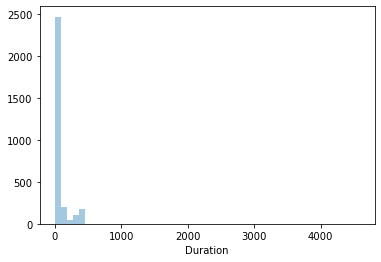

In [18]:
sns.distplot(z1['Duration'],kde=False)

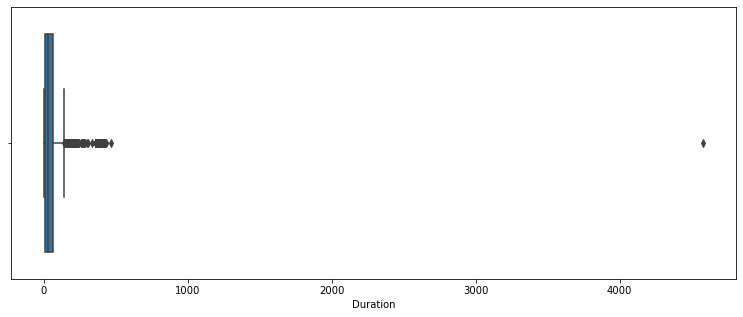

In [19]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.boxplot(z1['Duration'])

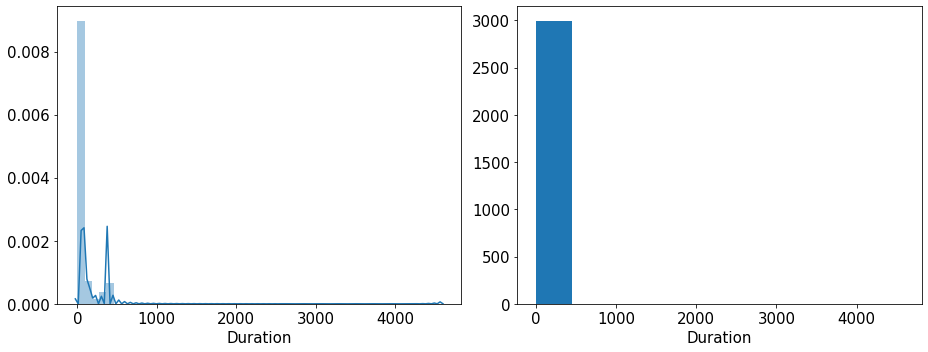

In [20]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(z1['Duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(z1['Duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Evaluating 'Sales'

In [21]:
z1['Sales'].unique()
z1['Sales'].value_counts()

20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00      1
171.00      1
206.60      1
271.00      1
Name: Sales, Length: 380, dtype: int64

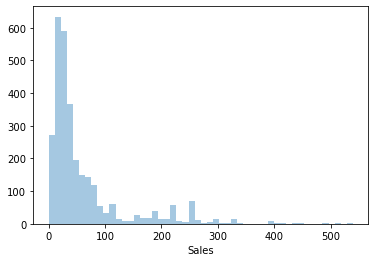

In [22]:
sns.distplot(z1['Sales'],kde=False)

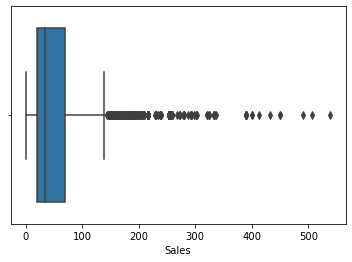

In [23]:
sns.boxplot(z1['Sales'])

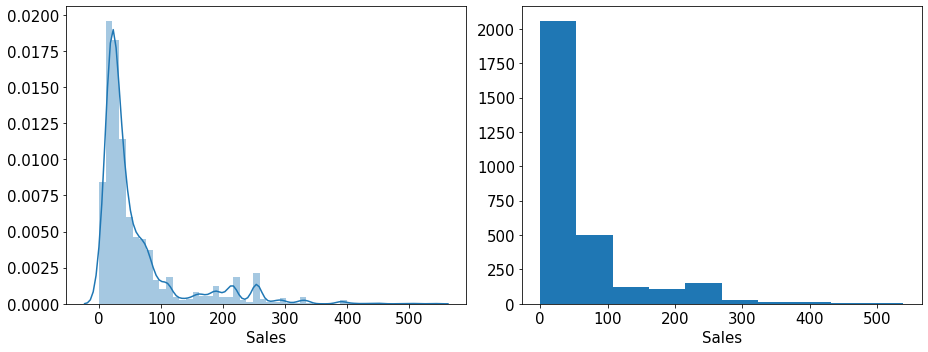

In [24]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(z1['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(z1['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Evaluating 'Product Name'

In [25]:
z1['Product Name'].unique()
z1['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

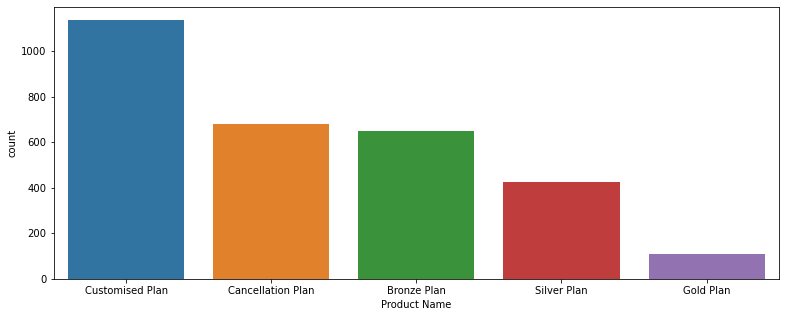

In [26]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.countplot(z1['Product Name'])

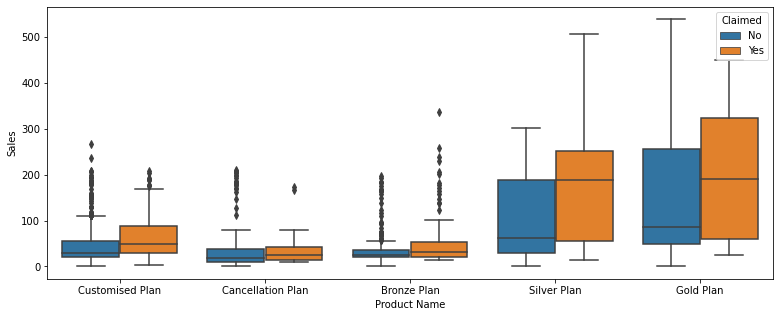

In [27]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.boxplot(data = z1, x = 'Product Name', y='Sales', hue = 'Claimed')

## Evaluating 'Destination'

In [28]:
z1['Destination'].unique()
z1['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

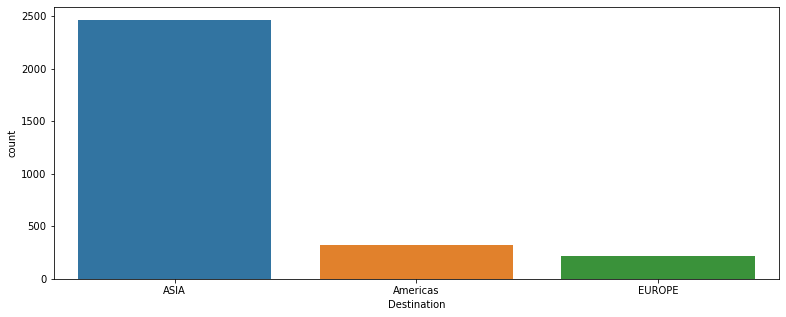

In [29]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.countplot(z1['Destination'])

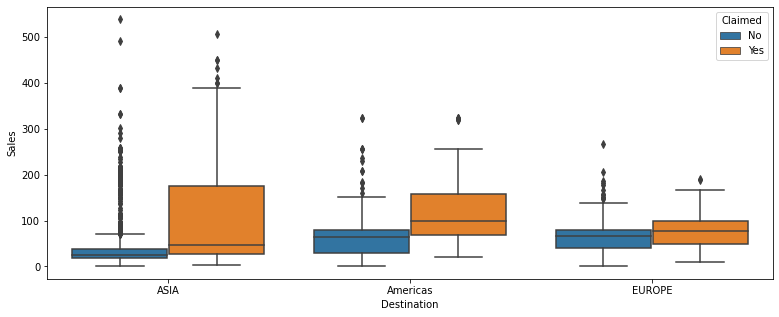

In [30]:
fig, (ax2)=plt.subplots(1,figsize=(13,5))
sns.boxplot(data = z1, x = 'Destination', y='Sales', hue = 'Claimed')

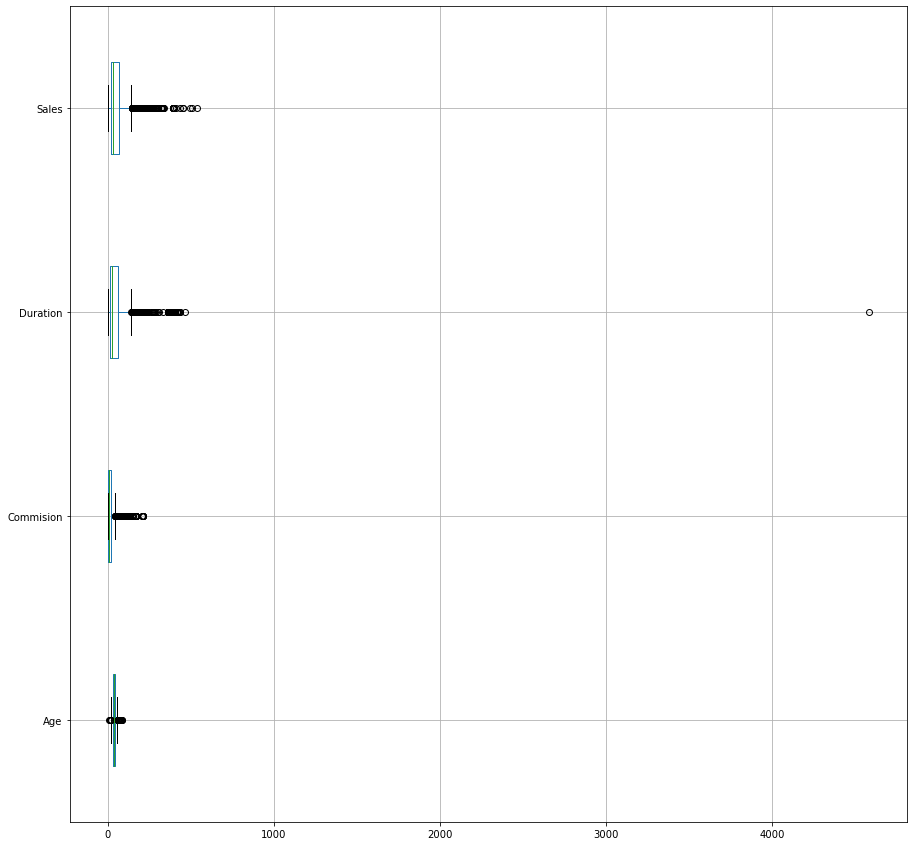

In [31]:
plt.figure(figsize=(15,15))
z1[['Age','Commision','Duration', 'Sales']].boxplot(vert=0)

## Checking pair plot for continuous variables

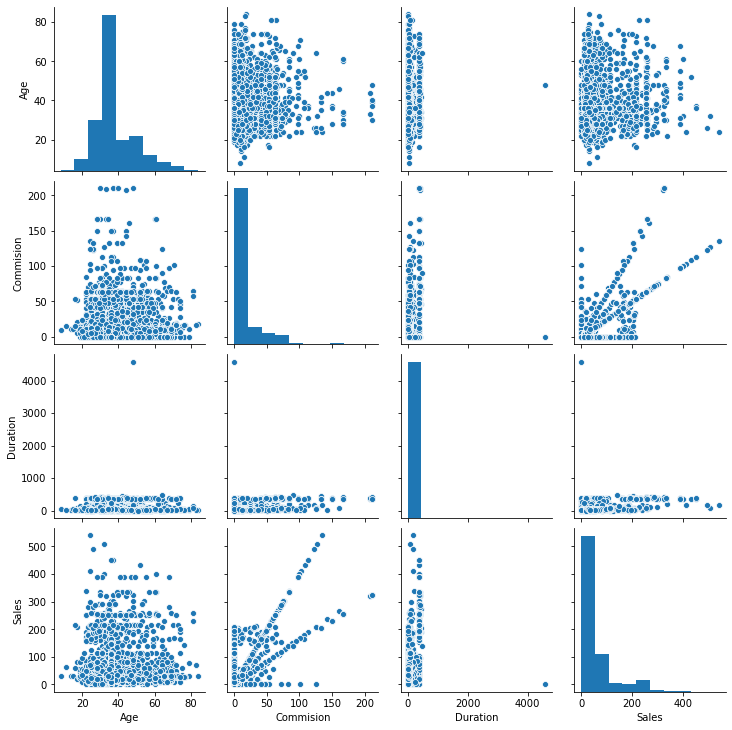

In [32]:
sns.pairplot(z1[['Age','Commision','Duration', 'Sales']])

## Checking for Correlations
The correlation among the varialbles is high & positive.

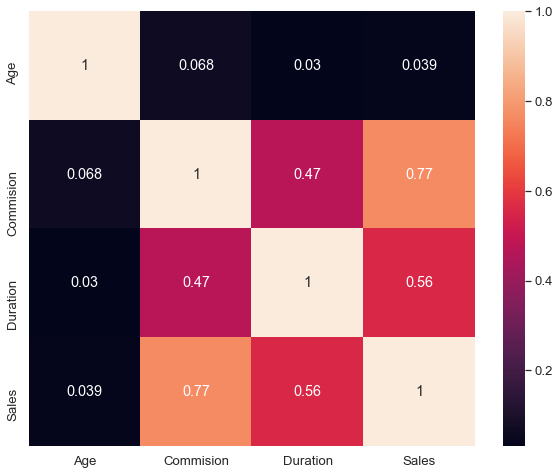

In [33]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(z1[['Age','Commision','Duration', 'Sales']].corr(), annot=True)

## Changing the Object Data Type to Categorical Data Type

In [34]:
for feature in z1.columns: 
    if z1[feature].dtype == 'object':
        z1[feature] = pd.Categorical(z1[feature]).codes

In [35]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [36]:
z1.head(5)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

## Extract x and y

In [38]:
X=z1.drop("Claimed",axis=1)
y=z1.pop("Claimed")

In [39]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    0
2997    0
2998    1
2999    0
Name: Claimed, Length: 3000, dtype: int8

## Split data into 70% Training and 30% Test Data
Reason- 

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

## Checking dimensions on the Train and Test data

In [41]:
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2100, 9)
x_test:  (900, 9)
y_train:  (2100,)
y_test:  (900,)


## Scaling the variables

In [42]:
from sklearn.preprocessing import StandardScaler

#### Initialize an object for StandardScaler

In [43]:
sc=StandardScaler()

#### Scale the training data

In [44]:
x_train=sc.fit_transform(x_train)

In [45]:
x_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

#### Apply the transformation on the test data

In [46]:
x_test = sc.transform(x_test)

In [47]:
x_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

#### Building Neural Network Model

In [48]:
clf = MLPClassifier(hidden_layer_sizes=[30,20, 40], max_iter=5000,
                     solver='adam', verbose=True,  random_state=21,tol=0.001)

### Fit the model on the training data

In [49]:
clf.fit(x_train,y_train)

Iteration 1, loss = 0.57352064
Iteration 2, loss = 0.53488103
Iteration 3, loss = 0.50928080
Iteration 4, loss = 0.49292645
Iteration 5, loss = 0.48482906
Iteration 6, loss = 0.48077461
Iteration 7, loss = 0.47823129
Iteration 8, loss = 0.47575526
Iteration 9, loss = 0.47387249
Iteration 10, loss = 0.47253808
Iteration 11, loss = 0.47089253
Iteration 12, loss = 0.46952441
Iteration 13, loss = 0.46867807
Iteration 14, loss = 0.46725019
Iteration 15, loss = 0.46533189
Iteration 16, loss = 0.46425313
Iteration 17, loss = 0.46346403
Iteration 18, loss = 0.46271386
Iteration 19, loss = 0.46110100
Iteration 20, loss = 0.45989812
Iteration 21, loss = 0.46041303
Iteration 22, loss = 0.45848390
Iteration 23, loss = 0.45773948
Iteration 24, loss = 0.45694792
Iteration 25, loss = 0.45608563
Iteration 26, loss = 0.45571159
Iteration 27, loss = 0.45488066
Iteration 28, loss = 0.45500145
Iteration 29, loss = 0.45560304
Iteration 30, loss = 0.45592958
Iteration 31, loss = 0.45104208
Iteration 32, los

MLPClassifier(hidden_layer_sizes=[30, 20, 40], max_iter=5000, random_state=21,
              tol=0.001, verbose=True)

### Predicting Training Data

#### Use the model to predict the training data

In [50]:
y_pred =clf.predict(x_train)

### Evaluating Model Performance on Training Data

In [51]:
from sklearn.metrics import confusion_matrix,classification_report

In [52]:
confusion_matrix(y_train,y_pred)

array([[1306,  165],
       [ 248,  381]], dtype=int64)

In [53]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1471
           1       0.70      0.61      0.65       629

    accuracy                           0.80      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



AUC: 0.850


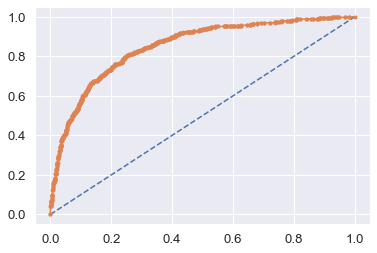

In [54]:
# AUC and ROC for the training data
# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Predicting Test Data and comparing model performance

In [55]:
y_pred = clf.predict(x_test)

In [56]:
confusion_matrix(y_test, y_pred)

array([[537,  68],
       [146, 149]], dtype=int64)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       605
           1       0.69      0.51      0.58       295

    accuracy                           0.76       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.75      0.76      0.75       900



AUC: 0.805


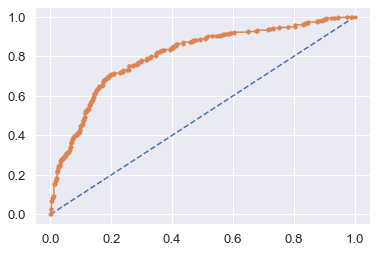

In [58]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Model Tuning through Grid Search

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [400],
    'max_iter': [5000],
    'solver': ['sgd'],
    'tol': [0.001],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [60]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [400], 'max_iter': [5000],
                         'solver': ['sgd'], 'tol': [0.001]})

In [61]:
grid_search.best_params_

{'hidden_layer_sizes': 400, 'max_iter': 5000, 'solver': 'sgd', 'tol': 0.001}

In [62]:
best_grid = grid_search.best_estimator_

In [63]:
best_grid

MLPClassifier(hidden_layer_sizes=400, max_iter=5000, random_state=1,
              solver='sgd', tol=0.001)

In [64]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [65]:
confusion_matrix(y_train,ytrain_predict)

array([[1350,  121],
       [ 356,  273]], dtype=int64)

### Accuracy of Train data

In [66]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1471
           1       0.69      0.43      0.53       629

    accuracy                           0.77      2100
   macro avg       0.74      0.68      0.69      2100
weighted avg       0.76      0.77      0.76      2100



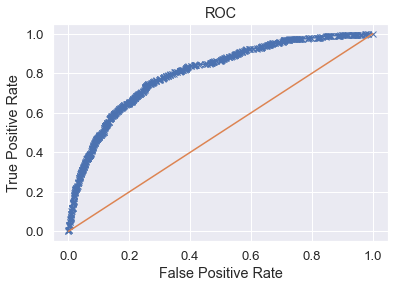

Area under Curve is 0.8041548366457392


In [67]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(x_train)[:,1]))

In [68]:
confusion_matrix(y_test,ytest_predict)

array([[568,  37],
       [194, 101]], dtype=int64)

### Accuracy of Test data

In [69]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       605
           1       0.73      0.34      0.47       295

    accuracy                           0.74       900
   macro avg       0.74      0.64      0.65       900
weighted avg       0.74      0.74      0.71       900



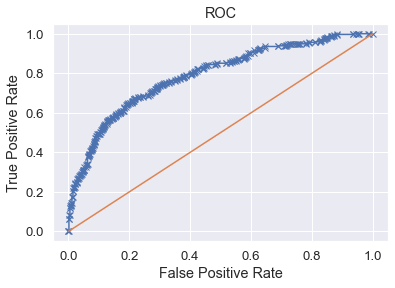

Area under Curve is 0.7898445160386609


In [70]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1]))

In [71]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=400, max_iter=5000, random_state=1,
              solver='sgd', tol=0.001)>

In [72]:
print(classification_report(y_train,ytrain_predict))
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1471
           1       0.69      0.43      0.53       629

    accuracy                           0.77      2100
   macro avg       0.74      0.68      0.69      2100
weighted avg       0.76      0.77      0.76      2100

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       605
           1       0.73      0.34      0.47       295

    accuracy                           0.74       900
   macro avg       0.74      0.64      0.65       900
weighted avg       0.74      0.74      0.71       900



## Building a Decision Tree Classifier

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, train_labels, test_labels = train_test_split(x_scaled, y, test_size=.30, random_state=5)

NameError: name 'x_scaled' is not defined